**Your Task**


**1. Data Preparation:**

Download and explore the US Superstore data.

Perform basic data cleaning and preprocessing.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ipywidgets import interact

In [ ]:
# Uploading the Dataset
from google.colab import files
uploaded = files.upload()

Saving US Superstore data.xls to US Superstore data.xls


In [ ]:
df = pd.read_excel('US Superstore data.xls', index_col=0)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 non-nu

**2. Data Visualization with Matplotlib:**

Create an interactive line chart to show sales trends over the years.

Build an interactive map to visualize sales distribution by country.

In [ ]:
# Interactive Line Chart - Sales Trends Over Years

# Create 'Year' column for analysis
df['Year'] = df['Order Date'].dt.year

# Aggregate sales by year
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()

# Interactive Line Chart
@interact(year_range=(sales_by_year['Year'].min(),sales_by_year['Year'].max()))
def plot_sales_trend(year_range):
  filtered_data = sales_by_year[sales_by_year['Year'] <= year_range]
  plt.figure(figsize=(10,6))
  plt.plot(filtered_data['Year'], filtered_data['Sales'], marker= 'o')
  plt.title('Sales Trend Over Years')
  plt.xlabel('Year')
  plt.ylabel('Total Sales')
  plt.grid(True)
  plt.show()

interactive(children=(IntSlider(value=2015, description='year_range', max=2017, min=2014), Output()), _dom_cla…

In [ ]:
# Aggregate sales by country
sales_by_country = df.groupby('Country')['Sales'].sum().reset_index()

fig = px.choropleth(sales_by_country, locations='Country', locationmode='country names',
                    color='Sales', hover_name='Country', color_continuous_scale='Blues')
fig.update_layout(title='Sales Distribution by Country')
fig.show()

**3. Data Visualization with Seaborn:**

Use Seaborn to generate a bar chart showing top 10 products by sales.

Create a scatter plot to analyze the relationship between profit and discount.

<ipython-input-13-48b2bfccf5c4>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




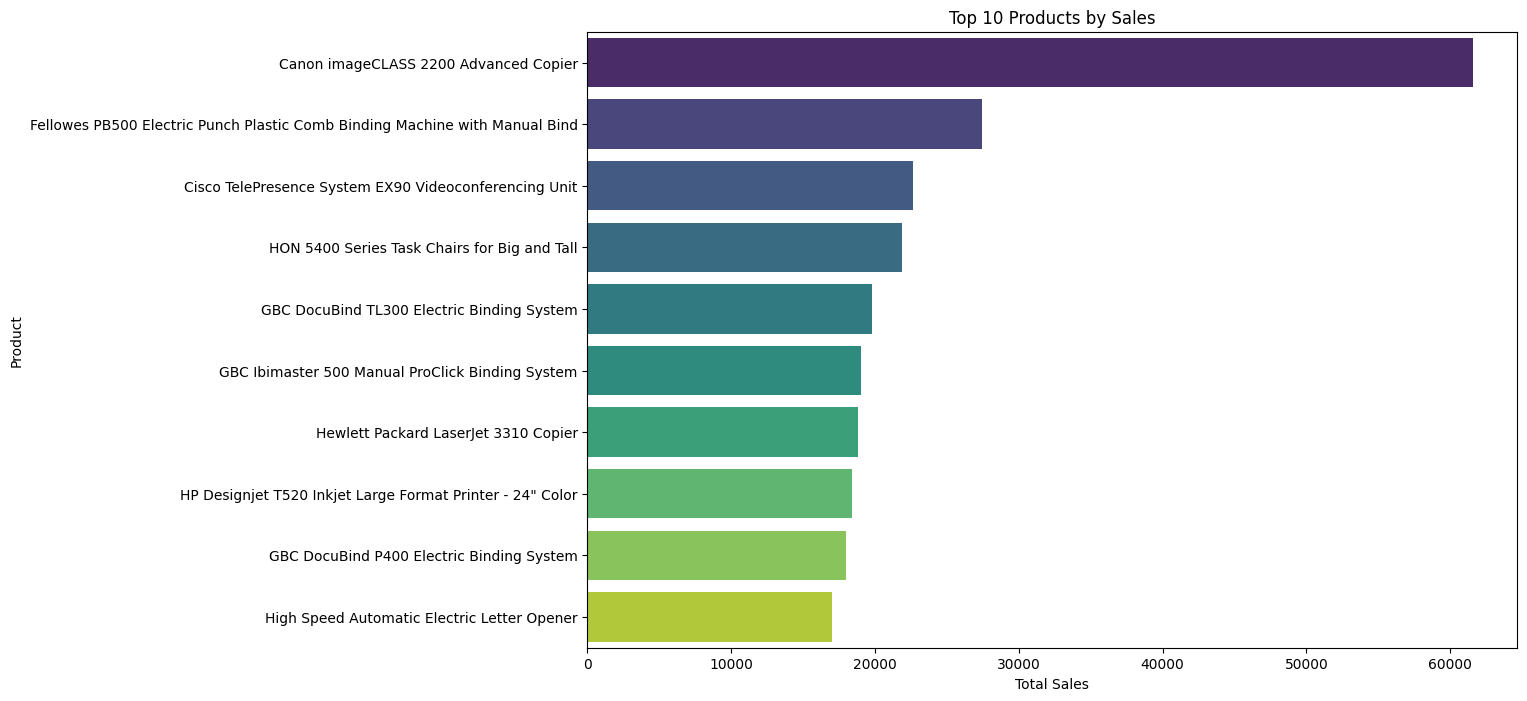

In [ ]:
# Bar Chart - Top 10 Products by Sales

#Aggregate sales by product
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='Sales', y='Product Name', data=top_products, palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

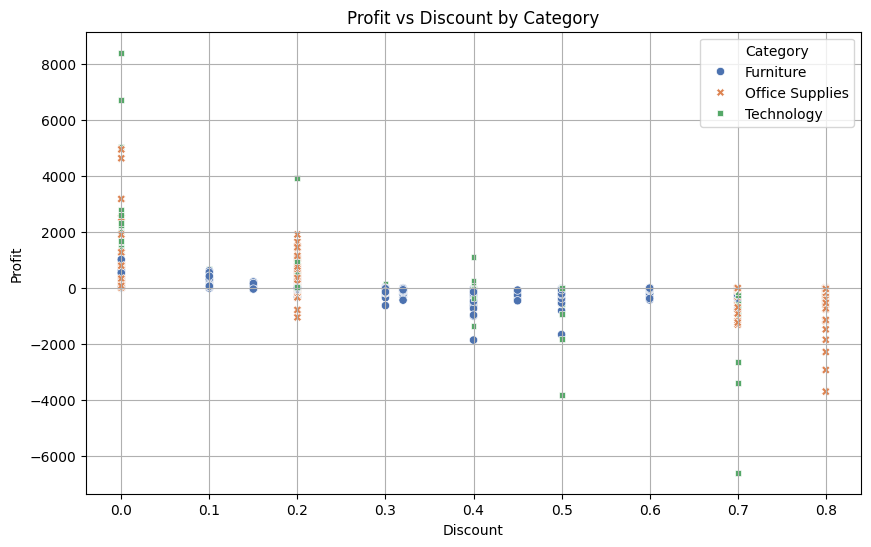

In [ ]:
# Scatter Plot - Profit vs. Discount

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category', style='Category', palette='deep')
plt.title('Profit vs Discount by Category')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

**4. Comparative Analysis:**

Compare the insights gained from Matplotlib and Seaborn visualizations.

Document your observations about the ease of use and effectiveness of both tools.


**Insights Gained**

**Matplotlib Visualizations**

**Sales Trends (Interactive Line Chart):**
The line chart provided a clear view of how sales evolved over the years.

By using ipywidgets, the chart is interactive, allowing for dynamic exploration of trends for selected year ranges.

**Sales Distribution by Country (Interactive Map):**

While Matplotlib itself isn’t inherently suited for interactive maps, integrating Plotly allowed me to create a vibrant choropleth map to visualize sales distribution across different countries.

**Seaborn Visualizations**

**Top 10 Products by Sales (Bar Chart):**

The bar chart is visually appealing, with automatic styling that highlights the top products effectively.

It is easy to produce a polished chart with minimal code.

**Profit vs. Discount (Scatter Plot):**

The scatter plot reveals clusters and patterns, making it easy to analyze the relationship between discount levels and profitability across categories.

Ease of Use

**Matplotlib:**

Pros: Offers complete control over plot customization (e.g., colors, labels, sizes).

Cons: More verbose and requires multiple lines of code for styling. Interactivity requires additional tools like ipywidgets or Plotly.

**Seaborn:**

Pros: Simpler and more concise. Provides beautiful default styles, making visualizations look polished with minimal code.

Cons: Less customizable than Matplotlib for complex, highly tailored plots.

**Effectiveness**

**Matplotlib:**

When precise control over every aspect of the plot is needed.

Simple static visualizations that can be enhanced with widgets for basic interactivity.

**Seaborn:**

Quick, elegant visualizations with built-in aggregation and styling.

High-level analysis and comparisons between categories.